# Health Insurance Plan Prediction Model with Machine Learning

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

### Data Pre-processing

In [2]:
df = pd.read_csv('Health_insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Data Visualization

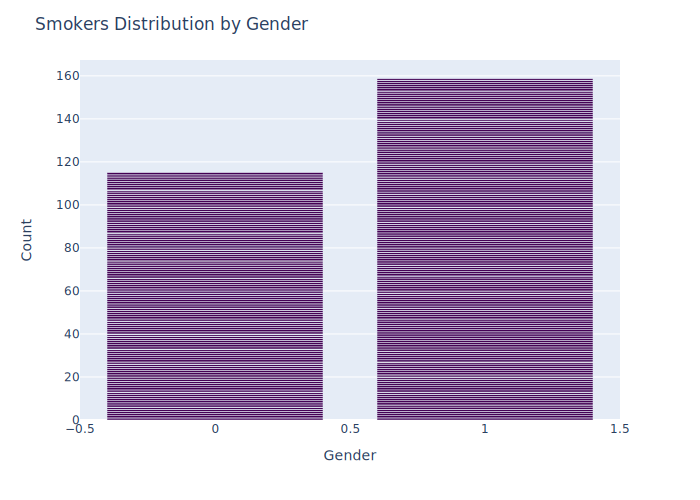

In [40]:
fig1 = px.bar(df, x = 'sex', y = 'smoker', color_discrete_sequence= px.colors.sequential.Viridis)
fig1.update_layout(xaxis_title = 'Gender', yaxis_title = 'Count', title = 'Smokers Distribution by Gender')
fig1.show('svg')

In [12]:
df.children.value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [13]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [15]:
regions = df['region'].value_counts().sort_values()

In [16]:
regions_names = regions.index
regions_values = regions.values

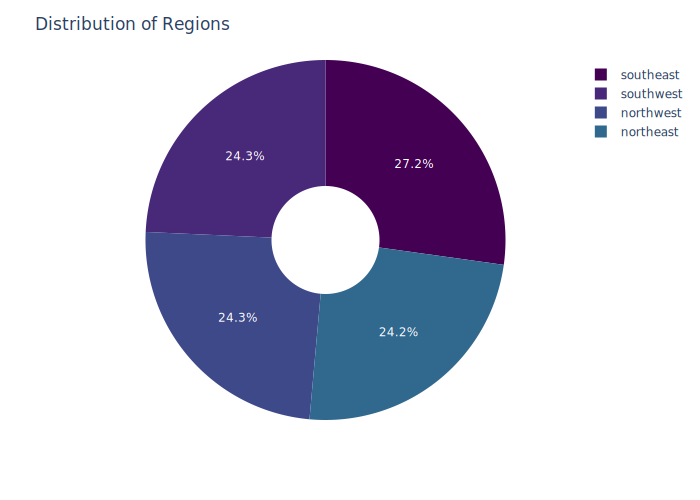

In [17]:
fig2 = px.pie(regions, 
              values = regions_values, 
              names = regions_names, 
              hole = 0.3,
              color_discrete_sequence=px.colors.sequential.Viridis)
fig2.update_layout(title = 'Distribution of Regions')
fig2.show('svg')

In [18]:
df["sex"] = df["sex"].map({"female": 0, "male": 1})
df["smoker"] = df["smoker"].map({"no": 0, "yes": 1})
df["region"] = df["region"].map({"southeast": 1, "southwest": 2, 'northwest':3, 'northeast':4})

In [19]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [20]:
df = df[['age', 'sex', 'bmi', 'smoker','region','children','charges']]

In [21]:
df

,age,sex,bmi,smoker,region,children,charges
0,19,0,27.900,1,2,0,16884.92400
1,18,1,33.770,0,1,1,1725.55230
2,28,1,33.000,0,1,3,4449.46200
3,33,1,22.705,0,3,0,21984.47061
4,32,1,28.880,0,3,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,0,3,3,10600.54830
1334,18,0,31.920,0,4,0,2205.98080
1335,18,0,36.850,0,1,0,1629.83350
1336,21,0,25.800,0,2,0,2007.94500


In [22]:
correlation = df.corr()

In [23]:
correlation

,age,sex,bmi,smoker,region,children,charges
age,1.000000,-0.020856,0.109272,-0.025019,0.006308,0.042469,0.299008
sex,-0.020856,1.000000,0.046371,0.076185,-0.012816,0.017163,0.057292
bmi,0.109272,0.046371,1.000000,0.003750,-0.262754,0.012759,0.198341
smoker,-0.025019,0.076185,0.003750,1.000000,-0.038873,0.007673,0.787251
region,0.006308,-0.012816,-0.262754,-0.038873,1.000000,0.001205,-0.039473
children,0.042469,0.017163,0.012759,0.007673,0.001205,1.000000,0.067998
charges,0.299008,0.057292,0.198341,0.787251,-0.039473,0.067998,1.000000


In [24]:
correlation['charges'].head(7).sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.039473
Name: charges, dtype: float64

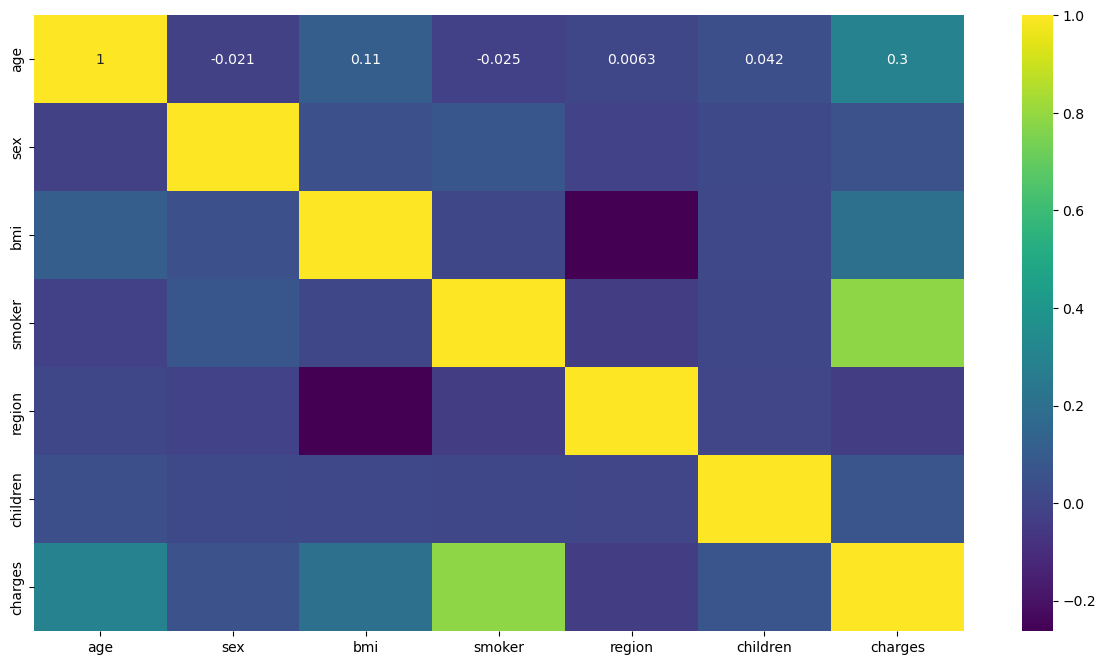

In [41]:
plt.figure(figsize=(15,8))
sns.heatmap(correlation,cmap = 'viridis', annot = True)
plt.show('svg')

### Model Building

In [26]:
X = df.drop('charges', axis=1)
Y = df['charges']

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [28]:
scaler = StandardScaler()

In [29]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [30]:
X_train_scaled

array([[ 0.47222651, -1.0246016 , -1.75652513, -0.50874702,  0.46555309,
         0.73433626],
       [ 0.54331294, -1.0246016 , -1.03308239, -0.50874702,  1.35035205,
        -0.91119211],
       [ 0.8987451 , -1.0246016 , -0.94368672, -0.50874702, -1.30404481,
        -0.91119211],
       ...,
       [ 1.3252637 ,  0.97598911, -0.89153925, -0.50874702,  1.35035205,
        -0.91119211],
       [-0.16755139, -1.0246016 ,  2.82086429,  1.96561348, -0.41924586,
         0.73433626],
       [ 1.1120044 ,  0.97598911, -0.10932713, -0.50874702, -0.41924586,
        -0.91119211]])

In [31]:
X_test_scaled

array([[ 0.45859585, -0.95618289, -0.93715188, -0.50233101,  1.43948714,
         0.82250933],
       [-0.18713281, -0.95618289, -0.16752679, -0.50233101,  0.55058725,
        -0.89961958],
       [ 1.82180078, -0.95618289, -0.66551949,  1.99071921,  0.55058725,
        -0.89961958],
       ...,
       [-0.04363755,  1.04582503, -0.48443124, -0.50233101,  1.43948714,
        -0.03855512],
       [ 1.1043245 , -0.95618289,  2.59486336,  1.99071921, -1.22721253,
        -0.89961958],
       [ 0.88908162, -0.95618289,  0.49646348, -0.50233101, -0.33831264,
        -0.03855512]])

In [32]:
model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                              max_depth=None, max_features='auto', max_leaf_nodes=None,
                              max_samples=None, min_impurity_decrease=0.0,
                              min_samples_leaf=1,min_samples_split=2, 
                              min_weight_fraction_leaf=0.0,
                              n_estimators=100, n_jobs=None, oob_score=False,
                              random_state=None, verbose=0, warm_start=False)

In [33]:
model.fit(X_train_scaled,Y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



RandomForestRegressor(max_features='auto')

In [34]:
accuracy = model.score(X_train_scaled,Y_train)*100

In [35]:
print('Accuracy of the Model (%) :', accuracy)

Accuracy of the Model (%) : 97.62498573561295


In [36]:
y_pred = model.predict(X_test_scaled)

In [37]:
X.columns

Index(['age', 'sex', 'bmi', 'smoker', 'region', 'children'], dtype='object')

In [38]:
print('Predictions For the Health Insurance Plan:')
a = float(input('Enter Your Age:'))
b = float(input('Gender (0:Female , 1:Male):'))
c = float(input('Enter your BMI value:'))
d = float(input('Are you a Smoker (0:No , 1:Yes)'))
e = float(input('Region (southeast: 1, southwest: 2, northwest:3, northeast:4) :'))
f = float(input('How many Children do you have:'))
features = np.array([[a,b,c,d,e,f]])
print('Predicted Health Insurance Plan Price :', model.predict(features))

Predictions For the Health Insurance Plan:


Enter Your Age: 33
Gender (0:Female , 1:Male): 1
Enter your BMI value: 33
Are you a Smoker (0:No , 1:Yes) 1
Region (southeast: 1, southwest: 2, northwest:3, northeast:4) : 3
How many Children do you have: 2


Predicted Health Insurance Plan Price : [49401.5765427]
